In [1]:
!pwd

/cygdrive/c/Users/changlin


In [1]:
!pip3 install opencv_contrib-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# !pip install opencv-python
# !pip install --user opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17
!pip3 install opencv-python

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


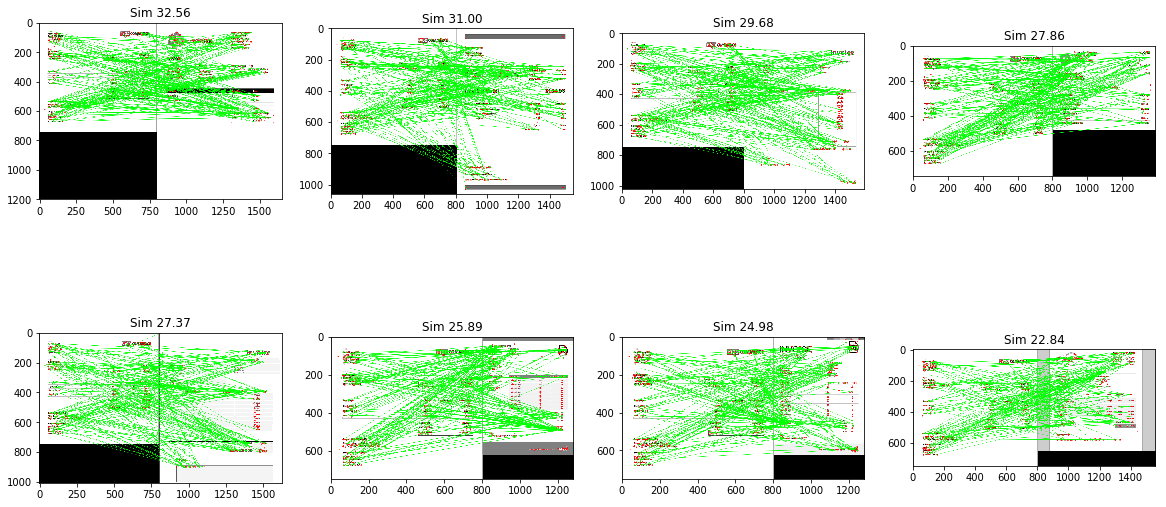

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import math


def getMatchNum(matches,ratio):
    '''返回特征点匹配数量和匹配掩码'''
    matchesMask=[[0,0] for i in range(len(matches))]
    matchNum=0
    for i,(m,n) in enumerate(matches):
        if m.distance<ratio*n.distance: #将距离比率小于ratio的匹配点删选出来
            matchesMask[i]=[1,0]
            matchNum+=1
    return (matchNum,matchesMask)

path='C:/Users/changlin/img_processing/'
queryPath=path+'QueryImages2/' #图库路径
samplePath=path+'Testimg/1.png' #样本图片
comparisonImageList=[] #记录比较结果

#创建SIFT特征提取器
sift = cv2.xfeatures2d.SIFT_create() 
#创建FLANN匹配对象
FLANN_INDEX_KDTREE=0
indexParams=dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
searchParams=dict(checks=50)
flann=cv2.FlannBasedMatcher(indexParams,searchParams)

sampleImage=cv2.imread(samplePath,0)
kp1, des1 = sift.detectAndCompute(sampleImage, None) #提取样本图片的特征
for parent,dirnames,filenames in os.walk(queryPath):
    for p in filenames:
        p=queryPath+p
        queryImage=cv2.imread(p,0)
        kp2, des2 = sift.detectAndCompute(queryImage, None) #提取比对图片的特征
        matches=flann.knnMatch(des1,des2,k=2) #匹配特征点，为了删选匹配点，指定k为2，这样对样本图的每个特征点，返回两个匹配
        (matchNum,matchesMask)=getMatchNum(matches,0.9) #通过比率条件，计算出匹配程度
        matchRatio=matchNum*100/len(matches)
        drawParams=dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=0)
        comparisonImage=cv2.drawMatchesKnn(sampleImage,kp1,queryImage,kp2,matches,None,**drawParams)
        comparisonImageList.append((comparisonImage,matchRatio)) #记录下结果

comparisonImageList.sort(key=lambda x:x[1],reverse=True) #按照匹配度排序
count=len(comparisonImageList)
column=4
row=math.ceil(count/column)
#绘图显示
figure,ax=plt.subplots(row,column, figsize=(20,10))
for index,(image,ratio) in enumerate(comparisonImageList):
    ax[int(index/column)][index%column].set_title('Sim %.2f' % ratio)
    ax[int(index/column)][index%column].imshow(image)
plt.show()

In [5]:
len(kp1)

1213

In [7]:
des1.shape

(1213, 128)

In [14]:
import sys
sys.getsizeof(comparisonImageList)/10**3, sys.getsizeof(comparisonImageList)/10**3

0.128